In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [10]:
# Ucitavamo podatke iz csv podatke u pandas okvir podataka
car_dataset = pd.read_csv('/content/car data.csv')

In [11]:
# Pregledamo prvih pet redova okvira podataka
car_dataset.head()

,Ime_automobila,Godiste,Prodajna_cena,Sadasnja_cena,Kilometraza,Tip_goriva,Tip_prodavca,Tip_prenosa,Broj_Vlasnika
0,Ritz,2014,3.35,5.59,27000,Benzin,AutoKuca,Manuelni,0
1,sx4,2013,4.75,9.54,43000,Dizel,AutoKuca,Manuelni,0
2,Ciaz,2017,7.25,9.85,6900,Benzin,AutoKuca,Manuelni,0
3,Wagon R,2011,2.85,4.15,5200,Benzin,AutoKuca,Manuelni,0
4,Swift,2014,4.60,6.87,42450,Dizel,AutoKuca,Manuelni,0


In [12]:
# Provera broja redova i kolona
car_dataset.shape

(301, 9)

In [13]:
# Dobijanje nekih informacija o ovom skupu podataka
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ime_automobila  301 non-null    object 
 1   Godiste         301 non-null    int64  
 2   Prodajna_cena   301 non-null    float64
 3   Sadasnja_cena   301 non-null    float64
 4   Kilometraza     301 non-null    int64  
 5   Tip_goriva      301 non-null    object 
 6   Tip_prodavca    301 non-null    object 
 7   Tip_prenosa     301 non-null    object 
 8   Broj_Vlasnika   301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
# Provera broja nedostajucih vrednosti u redu
car_dataset.isnull().sum()

Ime_automobila    0
Godiste           0
Prodajna_cena     0
Sadasnja_cena     0
Kilometraza       0
Tip_goriva        0
Tip_prodavca      0
Tip_prenosa       0
Broj_Vlasnika     0
dtype: int64

In [15]:
# Provera distribucije kategoricnih podataka
print(car_dataset.Tip_goriva.value_counts())
print(car_dataset.Tip_prodavca.value_counts())
print(car_dataset.Tip_prenosa.value_counts())

Benzin    239
Dizel      60
Gas         2
Name: Tip_goriva, dtype: int64
AutoKuca    195
Prodavac    106
Name: Tip_prodavca, dtype: int64
Manuelni     261
Automatik     40
Name: Tip_prenosa, dtype: int64


In [16]:
# Kodiranje "Tip_goriva" kolone
# Kodiranje "Tip_goriva" kolone
car_dataset.replace({'Tip_goriva':{'Benzin':0,'Dizel':1,'Gas':2}},inplace=True)

# Kodiranje "Tip_prodavca" kolone
car_dataset.replace({'Tip_prodavca':{'AutoKuca':0,'Prodavac':1}},inplace=True)

# Kodiranje "Tip_prenosa" kolone
car_dataset.replace({'Tip_prenosa':{'Manuelni':0,'Automatik':1}},inplace=True)

In [17]:
car_dataset.head()

,Ime_automobila,Godiste,Prodajna_cena,Sadasnja_cena,Kilometraza,Tip_goriva,Tip_prodavca,Tip_prenosa,Broj_Vlasnika
0,Ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,Ciaz,2017,7.25,9.85,6900,0,0,0,0
3,Wagon R,2011,2.85,4.15,5200,0,0,0,0
4,Swift,2014,4.60,6.87,42450,1,0,0,0


Deljenje podataka i cilja

In [18]:
X = car_dataset.drop(['Ime_automobila','Prodajna_cena'],axis=1)
Y = car_dataset['Prodajna_cena']

In [19]:
print(X)

     Godiste  Sadasnja_cena  Kilometraza  Tip_goriva  Tip_prodavca  \
0       2014           5.59        27000           0             0   
1       2013           9.54        43000           1             0   
2       2017           9.85         6900           0             0   
3       2011           4.15         5200           0             0   
4       2014           6.87        42450           1             0   
..       ...            ...          ...         ...           ...   
296     2016          11.60        33988           1             0   
297     2015           5.90        60000           0             0   
298     2009          11.00        87934           0             0   
299     2017          12.50         9000           1             0   
300     2016           5.90         5464           0             0   

     Tip_prenosa  Broj_Vlasnika  
0              0              0  
1              0              0  
2              0              0  
3              0       

In [20]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Prodajna_cena, Length: 301, dtype: float64


Deljenje trening i test podataka

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

1. Linearna regresija

In [22]:
# Ucitavamo model linearne regresije
lin_reg_model = LinearRegression()

In [23]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [24]:
# Predvidjanje na trening podacima
training_data_prediction = lin_reg_model.predict(X_train)

In [25]:
# R kvadratna greska
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R kvadratna greska : ", error_score)

R kvadratna greska :  0.8799451660493711


Vizualizovanje stvarnih i predvidjenih cena

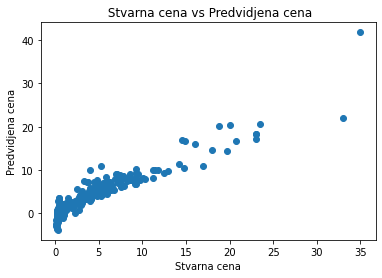

In [26]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Stvarna cena")
plt.ylabel("Predvidjena cena")
plt.title(" Stvarna cena vs Predvidjena cena")
plt.show()


In [27]:
# Predvidjanje na test podacima
test_data_prediction = lin_reg_model.predict(X_test)

In [28]:
# R kvadratna greska
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R kvadratna greska : ", error_score)

R kvadratna greska :  0.8365766715027051


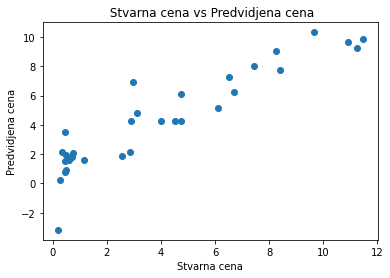

In [29]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Stvarna cena")
plt.ylabel("Predvidjena cena")
plt.title(" Stvarna cena vs Predvidjena cena")
plt.show()

2. Laso regresija

In [30]:
# Ucitavanje laso regresionog modela
lass_reg_model = Lasso()

In [31]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [32]:
# Predvidjanje na trening podacima
training_data_prediction = lass_reg_model.predict(X_train)

In [33]:
# R kvadratna greska
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R kvadratna greska : ", error_score)

R kvadratna greska :  0.8427856123435794


Vizualizovanje stvarnih i predvidjenih cena

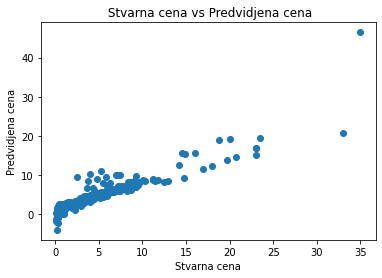

In [34]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Stvarna cena")
plt.ylabel("Predvidjena cena")
plt.title(" Stvarna cena vs Predvidjena cena")
plt.show()

In [35]:
# Predvidjanje na test podacima
test_data_prediction = lass_reg_model.predict(X_test)

In [36]:
# R kvadratna greska
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R kvadratna greska : ", error_score)

R kvadratna greska :  0.8709167941173195


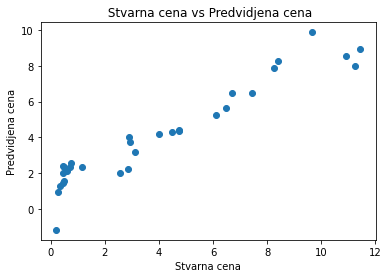

In [37]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Stvarna cena")
plt.ylabel("Predvidjena cena")
plt.title(" Stvarna cena vs Predvidjena cena")
plt.show()